# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [69]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------- -------------------------------- 2.4/12.8 MB 13.4 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/12.8 MB 19.6 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 23.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Importing the necessary libraries

In [70]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [71]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [72]:
# Import the first file - True.csv
true_data = pd.read_csv('True.csv')

# Import the second file - Fake.csv
fake_data = pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [73]:
# Inspect the DataFrame with True News to understand the given data
true_data.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [74]:
true_data.describe()

,title,text,date
count,21417,21417,21417
unique,20826,21192,716
top,Factbox: Trump fills top jobs for his administration,"(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United States drops a massive GBU-43 bomb, the largest non-nuclear bomb it has ever used in combat, in Afghanistan against a series of caves used by Islamic State militants, the Pentagon says. Trump says Pyongyang is a problem that “will be taken care of” amid speculation that North Korea is on the verge of a sixth nuclear test. Military force cannot resolve tension over North Korea, China warns, while an influential Chinese newspaper urges Pyongyang to halt its nuclear program in exchange for Beijing’s protection. The Trump administration is focusing its North Korea strategy on tougher economic sanctions, possibly including intercepting cargo ships and punishing Chinese banks doing business with Pyongyang, U.S. officials say. Trump says “things will work out fine” between the United States and Russia, a day after declaring U.S.-Russian relations may be at an all-time low. Trump signals he could be moving closer to the mainstream on monetary policy, saying he has not ruled out reappointment of Janet Yellen as Federal Reserve chair as he considers his choices for the U.S. central bank. [nL1N1HL14B] Trump signs a resolution that will allow U.S. states to restrict how federal funds for contraception and reproductive health are spent, a move cheered by anti-abortion campaigners. Democratic Senator Chris Van Hollen presses Deutsche Bank to release information about issues including Trump’s debt and any bank meetings with Trump administration officials, saying he has “great concern” about possible conflicts of interest. EXPORT-IMPORT BANK Trump’s office says he plans to revive the hobbled Export-Import Bank of the United States, a victory for American manufacturers such as Boeing Co and General Electric Co that have overseas customers that use the agency’s government-backed loans to purchase their products. Top Wall Street bankers say they are having positive discussions about financial regulation in Washington, and downplay the idea U.S. policymakers may force their institutions to split up. The United States is pushing for trade to be a key issue in top-level economic talks with Japan, a source says, an unwelcome development for Tokyo, which is seeking to fend off U.S. pressure to reduce the bilateral trade imbalance. Trump’s administration has focused on one group of illegal immigrants more than others: women with children, according to eight Department of Homeland Security officials interviewed by Reuters about agency planning.","December 20, 2017"
freq,14,8,182


In [75]:
# Inspect the DataFrame with Fake News to understand the given data
fake_data.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former

In [76]:
fake_data.describe()

,title,text,date
count,23502,23502,23481
unique,17914,17466,1692
top,MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead,,"May 10, 2017"
freq,6,626,46


In [77]:
fake_data.shape

(23523, 3)

In [78]:
# Print the column details for True News DataFrame
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [79]:
# Print the column details for Fake News Dataframe
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [80]:
# Print the column names of both DataFrames
print("True news data columns:")
print(true_data.columns)
print("-"*30)
print("Fake news data columns:")
print(fake_data.columns)

True news data columns:
Index(['title', 'text', 'date'], dtype='object')
------------------------------
Fake news data columns:
Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [81]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_data["news_label"] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_data["news_label"] = 0

In [82]:
true_data.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [83]:
fake_data.head()

,title,text,date,news_label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before th

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [84]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_data = pd.concat([true_data, fake_data], axis=0).reset_index(drop=True)

In [85]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_data.head(5)

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [86]:
# Check Presence of Null Values
print("Null values in each column:")
print(combined_data.isnull().sum())

Null values in each column:
title         21
text          21
date          42
news_label     0
dtype: int64


In [87]:
combined_data.shape

(44940, 4)

In [88]:
# Handle Rows with Null Values
combined_data = combined_data.dropna()

In [89]:
#print null values after dropping null from columns
print(combined_data.isnull().sum())

title         0
text          0
date          0
news_label    0
dtype: int64


In [90]:
combined_data.shape

(44898, 4)

In [91]:
combined_data.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [92]:
combined_data.columns

Index(['title', 'text', 'date', 'news_label'], dtype='object')

In [93]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
##Combine the title and text columns to form the news_text
combined_data['news_text'] = combined_data[['title', 'text']].astype(str).agg(' '.join, axis=1)

# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_data = combined_data[['news_text', 'news_label']]

# Display the first 5 rows of the updated DataFrame to check the result
print(combined_data.head(5))

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [94]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

#create a new datarame
df_clean = pd.DataFrame()
df_clean = combined_data

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = combined_data['news_label']


In [95]:
# Check the updated DataFrame
print(df_clean.head())
print(df_clean['news_label'].value_counts())

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [96]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(input_text):
    # Convert to lower case
    input_text = input_text.lower()

    # Remove text in square brackets
    input_text = re.sub(r'\[.*?\]', '', input_text)

    # Remove punctuation
    input_text = input_text.translate(str.maketrans('', '', string.punctuation))

    # Remove words with numbers
    input_text = re.sub(r'\w*\d\w*', '', input_text)

    return input_text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [97]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = combined_data['news_text'].apply(clean_text)
df_clean['news_label'] = combined_data['news_label']

In [98]:
df_clean.head(2)

news_text  \
0  As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Represent

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [99]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary resources (run once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatizeText(input_text):
    # Tokenize
    tokens = word_tokenize(input_text)

    # POS tagging
    pos_tags = pos_tag(tokens)

    # Keep only nouns (NN, NNS), remove stopwords, and lemmatize
    lemmatized = [
        lemmatizer.lemmatize(word.lower(), 'n')
        for word, tag in pos_tags
        if (tag in ['NN', 'NNS']) and (word.lower() not in stop_words)
    ]

    return " ".join(lemmatized)

[nltk_data] Downloading package punkt to C:\Users\chinmayajeet
[nltk_data]     ojha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\chinmayajeet
[nltk_data]     ojha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chinmayajeet
[nltk_data]     ojha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\chinmayajeet
[nltk_data]     ojha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\chinmayajeet
[nltk_data]     ojha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [100]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['cleaned_text'].apply(lemmatizeText)

# Preview result
print(df_clean[['cleaned_text', 'lemmatized_text', 'news_label']].head())
print(df_clean.info())

### Save the Cleaned data as a csv file (Recommended)

In [101]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("clean_df.csv")

# Save the cleaned DataFrame to CSV
df_clean.to_csv("clean_df.csv", index=False)

# Later, instead of reprocessing everything, just load it directly
df_clean = pd.read_csv("clean_df.csv")

In [102]:
# Check the first few rows of the DataFrame
df_clean.head(5)

news_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both disc

In [103]:
# Check the dimensions of the DataFrame
print("DataFrame dimensions:", df_clean.shape)

DataFrame dimensions: (44898, 4)


In [104]:
# Check the number of non-null entries and data types of each column
print("\nDataFrame info:")
print(df_clean.info())

# Check of null values
print("\nMissing values per column:")
print(df_clean.isnull().sum())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44898 non-null  object
 1   news_label       44898 non-null  int64 
 2   cleaned_text     44898 non-null  object
 3   lemmatized_text  44889 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None

Missing values per column:
news_text          0
news_label         0
cleaned_text       0
lemmatized_text    9
dtype: int64


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [105]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

# Define features (X) and labels (y)
X = df_clean['lemmatized_text']   # input text
y = df_clean['news_label']        # target labels

# Split into 70% train and 30% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])

Training set size: 31428
Validation set size: 13470


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [106]:
df_clean.info()
df_clean.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44898 non-null  object
 1   news_label       44898 non-null  int64 
 2   cleaned_text     44898 non-null  object
 3   lemmatized_text  44889 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


Index(['news_text', 'news_label', 'cleaned_text', 'lemmatized_text'], dtype='object')

In [107]:
# First combine X_train and y_train back into a DataFrame for easier handling
train_df = pd.DataFrame({'lemmatized_text': X_train, 'news_label': y_train})
print("train_df columns:"+ train_df.columns)

print("Duplicates :")
print(train_df.duplicated(subset=["news_label","lemmatized_text"]).sum())
train_df = train_df.drop_duplicates(subset=["news_label","lemmatized_text"])

train_df.info()
train_df.columns

Index(['train_df columns:lemmatized_text', 'train_df columns:news_label'], dtype='object')
Duplicates :
2936
<class 'pandas.core.frame.DataFrame'>
Index: 28492 entries, 32218 to 31638
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   lemmatized_text  28491 non-null  object
 1   news_label       28492 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 667.8+ KB


Index(['lemmatized_text', 'news_label'], dtype='object')

In [108]:
#lets merge train_df with df_clean to get other column value for train set
train_df = pd.merge(train_df, df_clean, on=["news_label","lemmatized_text"], how='left')

train_df.info()
train_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33854 entries, 0 to 33853
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   lemmatized_text  33845 non-null  object
 1   news_label       33854 non-null  int64 
 2   news_text        33854 non-null  object
 3   cleaned_text     33854 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


Index(['lemmatized_text', 'news_label', 'news_text', 'cleaned_text'], dtype='object')

In [109]:
# Add a new column to calculate the character length of cleaned news text
train_df['cleaned_text_length'] = train_df['cleaned_text'].astype(str).apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_text_length'] = train_df['lemmatized_text'].astype(str).apply(len)

In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33854 entries, 0 to 33853
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   lemmatized_text         33845 non-null  object
 1   news_label              33854 non-null  int64 
 2   news_text               33854 non-null  object
 3   cleaned_text            33854 non-null  object
 4   cleaned_text_length     33854 non-null  int64 
 5   lemmatized_text_length  33854 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


In [111]:
#lets check the results
print(train_df[['cleaned_text', 'cleaned_text_length',
                'lemmatized_text', 'lemmatized_text_length']].head())
#train_df.head()

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

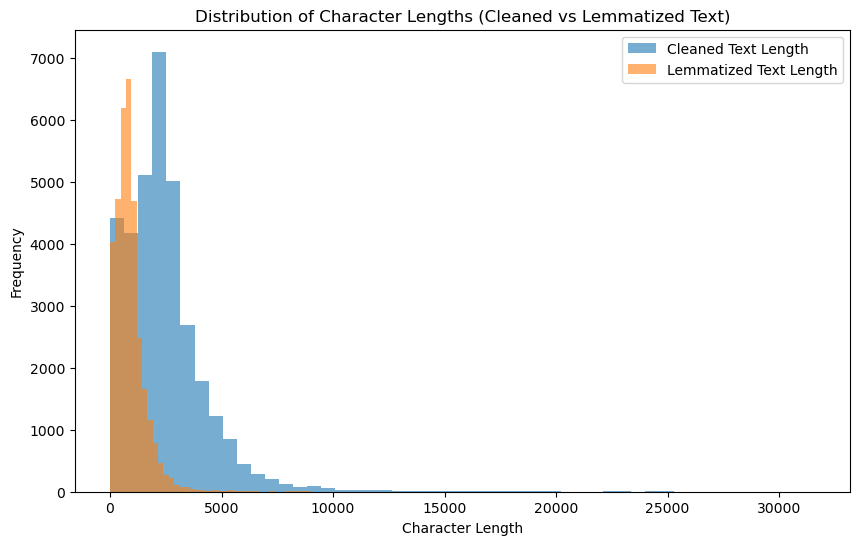

In [112]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(10,6))

# Add histogram for cleaned news text
plt.hist(train_df['cleaned_text_length'].dropna(), bins=50, alpha=0.6, label='Cleaned Text Length')

# Add histogram for lemmatized news text with POS tags removed
plt.hist(train_df['lemmatized_text_length'].dropna(), bins=50, alpha=0.6, label='Lemmatized Text Length')

# Labels and title
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.title("Distribution of Character Lengths (Cleaned vs Lemmatized Text)")
plt.legend()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

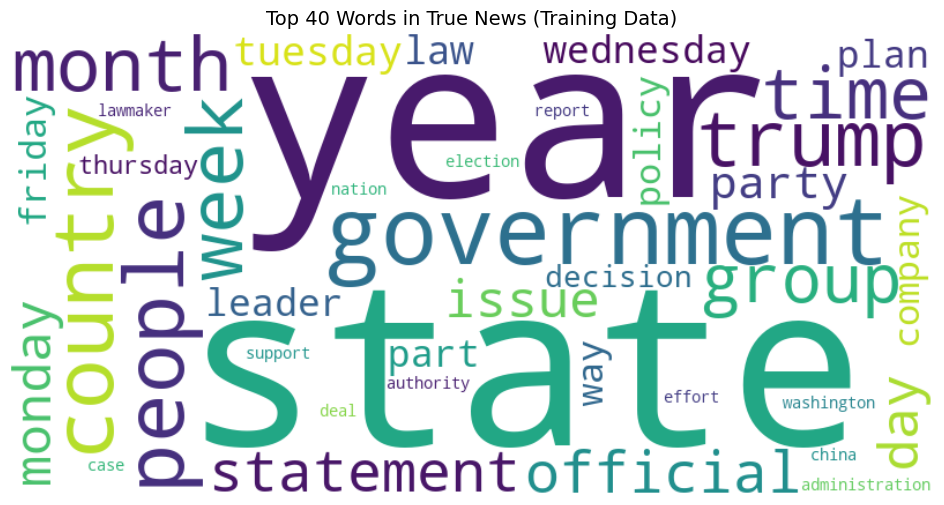

In [113]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = train_df[train_df['news_label'] == 1]['lemmatized_text'].dropna().astype(str)

# Generate word cloud for True News
wordcloud_true = WordCloud(width=800, height=400, max_words=40, background_color='white', colormap='viridis').generate(" ".join(true_news_text))

#Display the top 40 word by frequency
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Words in True News (Training Data)", fontsize=14)
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

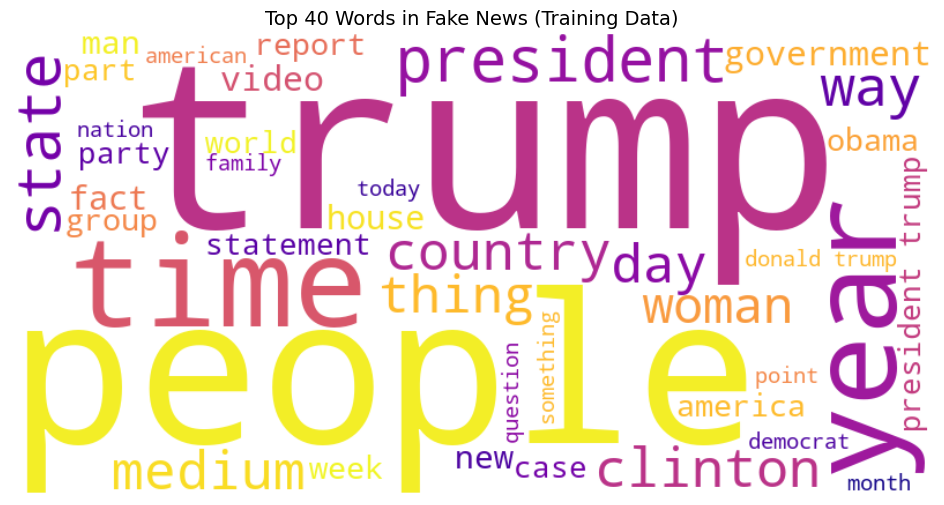

In [114]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = train_df[train_df['news_label'] == 0]['lemmatized_text'].dropna().astype(str)

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white', colormap='plasma').generate(" ".join(fake_news_text))

# Plot WordCloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Words in Fake News (Training Data)", fontsize=14)
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [115]:
# Write a function to get the specified top n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(1,1)):

    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)

    # word frequency dictionary
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return words_freq[:n]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [116]:
# Handle NaN values in the text data
train_df.info()
#train_df['cleaned_text'] = train_df['cleaned_text'].fillna("")
#train_df['lemmatized_text'] = train_df['lemmatized_text'].fillna("")
train_df = train_df.dropna(subset=['cleaned_text', 'lemmatized_text'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33854 entries, 0 to 33853
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   lemmatized_text         33845 non-null  object
 1   news_label              33854 non-null  int64 
 2   news_text               33854 non-null  object
 3   cleaned_text            33854 non-null  object
 4   cleaned_text_length     33854 non-null  int64 
 5   lemmatized_text_length  33854 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [117]:
#Creating a common function for plotting bar graph as it will ve redundant otherwise
def plot_bar_graph(title, listGram, xlabel, ylabel, palleteColor):

  # Plot bar graph
  unigrams, freqs = zip(*listGram)
  plt.figure(figsize=(10,6))
  sns.barplot(x=list(freqs), y=list(unigrams), palette=palleteColor)
  plt.title(title)
  #plt.gca().invert_yaxis()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def print_top_news(title, listGram ):
  #Print top 10 true/fake news
  print(title)
  for word, freq in listGram:
      print(f"{word}: {freq}")


Top 10 Unigrams in True News:
trump: 33631
state: 25661
president: 19365
reuters: 16760
government: 14086
year: 13302
house: 13019
people: 11035
party: 10536
election: 10128


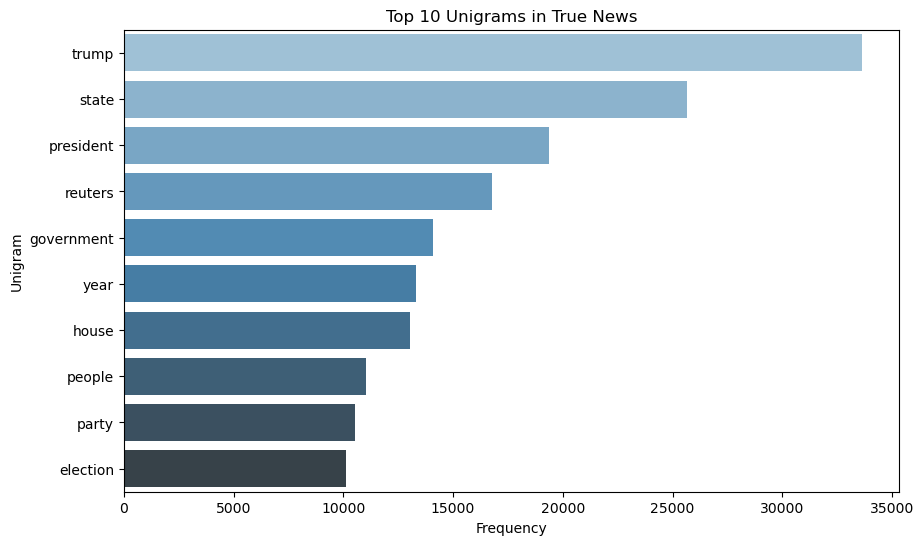

In [118]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top10_unigrams_true = get_top_ngrams(true_news_text, n=10, ngram_range=(1,1))

#print the top 10 true news
print_top_news("Top 10 Unigrams in True News:", top10_unigrams_true)

#plot bar graph
plot_bar_graph("Top 10 Unigrams in True News", top10_unigrams_true, "Frequency", "Unigram","Blues_d")

# print("Top 10 Unigrams in True News:")
# for word, freq in top10_unigrams_true:
#     print(f"{word}: {freq}")

# # Plot bar graph
# unigrams, freqs = zip(*top10_unigrams_true)
# plt.figure(figsize=(10,6))
# sns.barplot(x=list(freqs), y=list(unigrams), palette="Blues_d")
# plt.title("Top 10 Unigrams in True News")
# plt.xlabel("Frequency")
# plt.ylabel("Unigram")
# plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
donald trump: 2077
barack obama: 1998
washington reuters: 1978
president barack: 1946
president trump: 1908
reuters president: 1825
president donald: 1796
secretary state: 1664
house representative: 1634
trump campaign: 1446


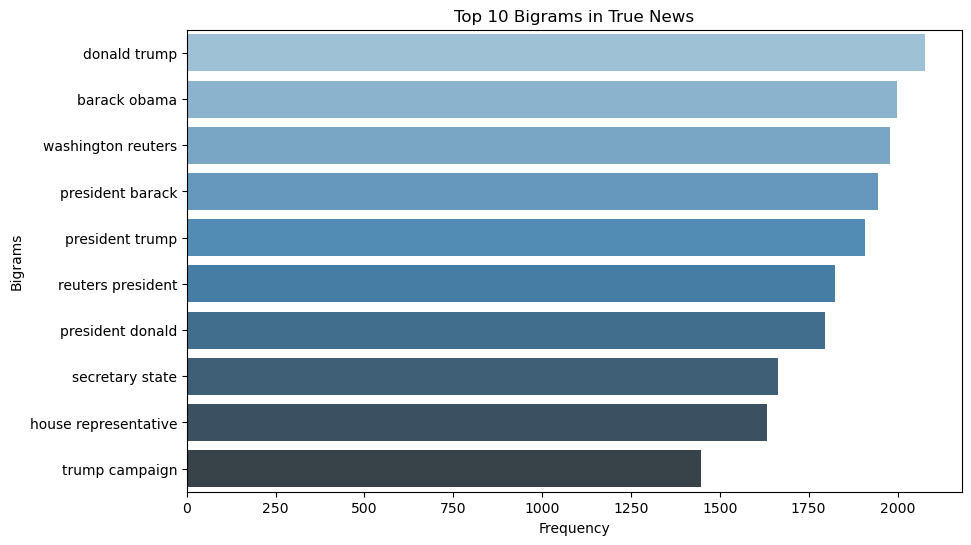

In [119]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
# Get top 10 bigrams
top10_bigrams_true = get_top_ngrams(true_news_text, n=10, ngram_range=(2,2))

#print the top 10 true news
print_top_news("Top 10 Bigrams in True News:", top10_bigrams_true)

bigrams = [b for b, _ in top10_bigrams_true]
freqs = [f for _, f in top10_bigrams_true]

#plot bar graph
plot_bar_graph("Top 10 Bigrams in True News", top10_bigrams_true, "Frequency", "Bigrams","Blues_d")

# print("Top 10 Bigrams in True News:")
# for bigram, freq in top10_bigrams_true:
#     print(f"{bigram}: {freq}")

# # Plot as bar graph
# import matplotlib.pyplot as plt

# bigrams = [b for b, _ in top10_bigrams_true]
# freqs = [f for _, f in top10_bigrams_true]

# plt.figure(figsize=(10,6))
# plt.barh(bigrams, freqs, color="skyblue")
# plt.xlabel("Frequency")
# plt.ylabel("Bigrams")
# plt.title("Top 10 Bigrams in True News")
# plt.gca().invert_yaxis()  # highest freq at top
# plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
president barack obama: 1754
president donald trump: 799
washington reuters president: 569
reuters president trump: 559
secretary state rex: 483
president vladimir putin: 466
state rex tillerson: 464
speaker paul ryan: 368
leader mitch mcconnell: 349
chancellor angela merkel: 318


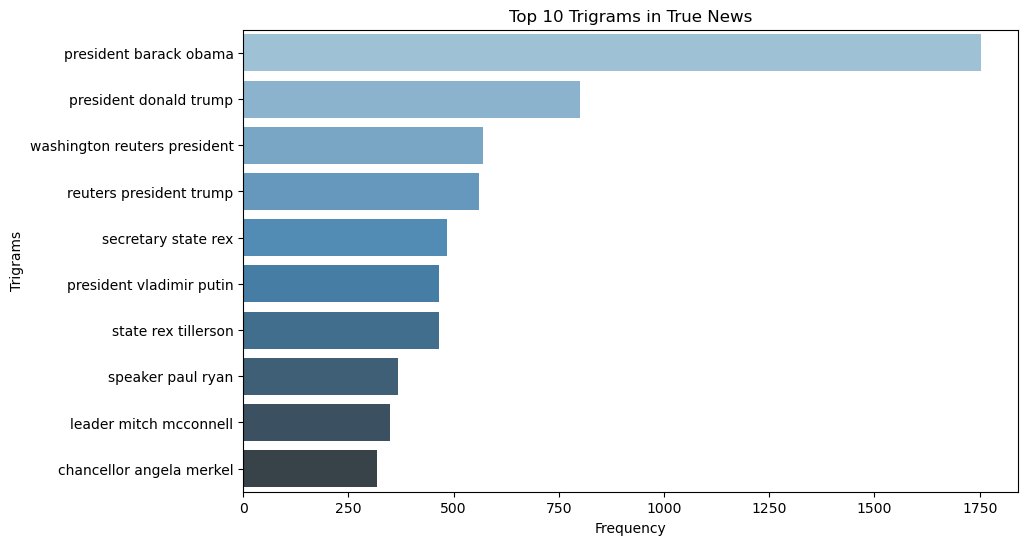

In [120]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
# Get top 10 trigrams
top10_trigrams_true = get_top_ngrams(true_news_text, n=10, ngram_range=(3,3))

#print the top 10 true news
print_top_news("Top 10 Trigrams in True News:", top10_trigrams_true)

trigrams = [t for t, _ in top10_trigrams_true]
freqs = [f for _, f in top10_trigrams_true]

#plot bar graph
plot_bar_graph("Top 10 Trigrams in True News", top10_trigrams_true, "Frequency", "Trigrams","Blues_d")

# print("Top 10 Trigrams in True News:")
# for trigram, freq in top10_trigrams_true:
#     print(f"{trigram}: {freq}")

# trigrams = [t for t, _ in top10_trigrams_true]
# freqs = [f for _, f in top10_trigrams_true]

# plt.figure(figsize=(10,6))
# plt.barh(trigrams, freqs, color="lightgreen")
# plt.xlabel("Frequency")
# plt.ylabel("Trigrams")
# plt.title("Top 10 Trigrams in True News")
# plt.gca().invert_yaxis()  # highest freq at top
# plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
trump: 50766
president: 21634
people: 20572
state: 17253
clinton: 14857
time: 14107
year: 12010
news: 11872
obama: 10071
image: 10038


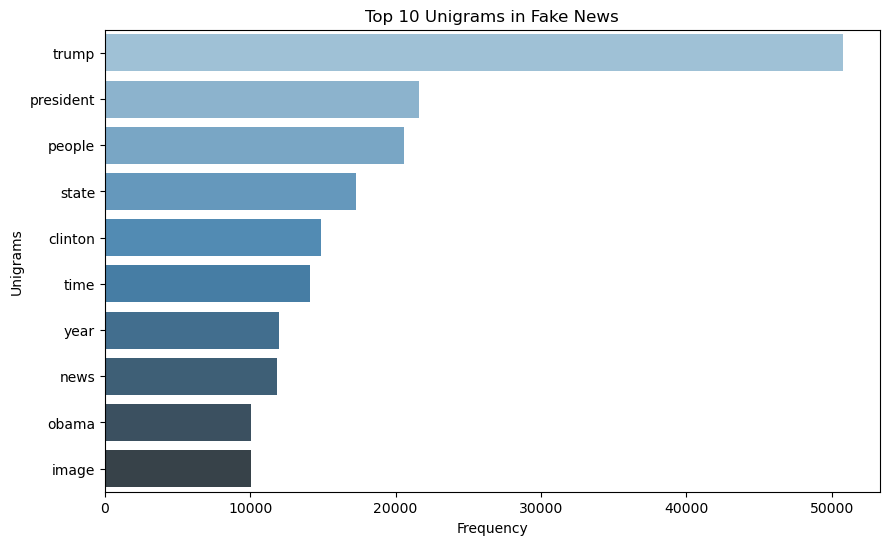

In [121]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top10_unigrams_fake = get_top_ngrams(fake_news_text, n=10, ngram_range=(1,1))

#print the top 10 fake news
print_top_news("Top 10 Unigrams in Fake News:", top10_unigrams_fake)

#plot bar graph
plot_bar_graph("Top 10 Unigrams in Fake News", top10_unigrams_fake, "Frequency", "Unigrams","Blues_d")

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
donald trump: 3953
president trump: 3453
president obama: 2021
century wire: 1701
trump campaign: 1506
barack obama: 1502
trump supporter: 1473
state department: 1362
secretary state: 1324
law enforcement: 1278


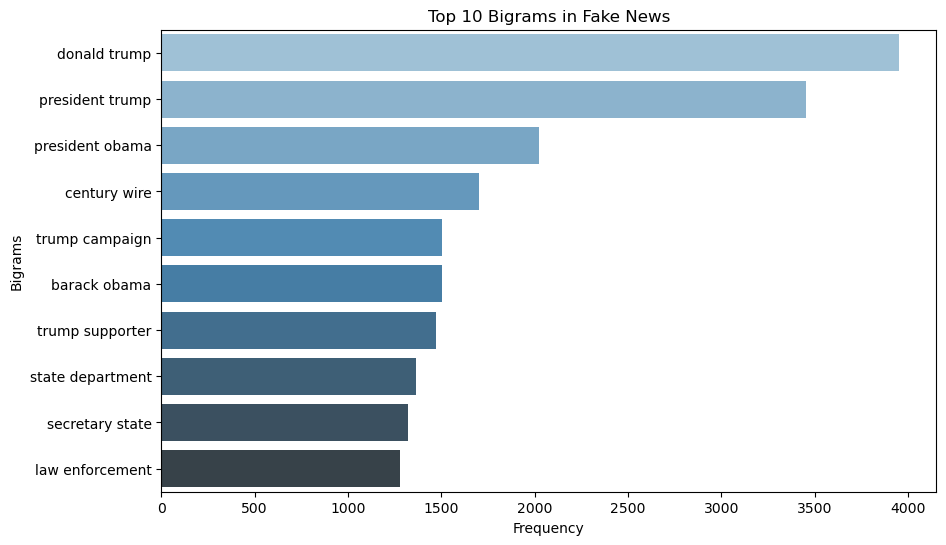

In [122]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top10_bigrams_fake = get_top_ngrams(fake_news_text, n=10, ngram_range=(2,2))

#print the top 10 true news
print_top_news("Top 10 Bigrams in Fake News:", top10_bigrams_fake)

bigrams = [b for b, _ in top10_bigrams_fake]
freqs = [f for _, f in top10_bigrams_fake]

#plot bar graph
plot_bar_graph("Top 10 Bigrams in Fake News", top10_bigrams_fake, "Frequency", "Bigrams","Blues_d")

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
news century wire: 826
president barack obama: 629
donald trump realdonaldtrump: 543
image video screen: 436
video screen capture: 411
president donald trump: 257
department homeland security: 254
secretary state clinton: 221
broadcast boiler room: 194
fbi director james: 194


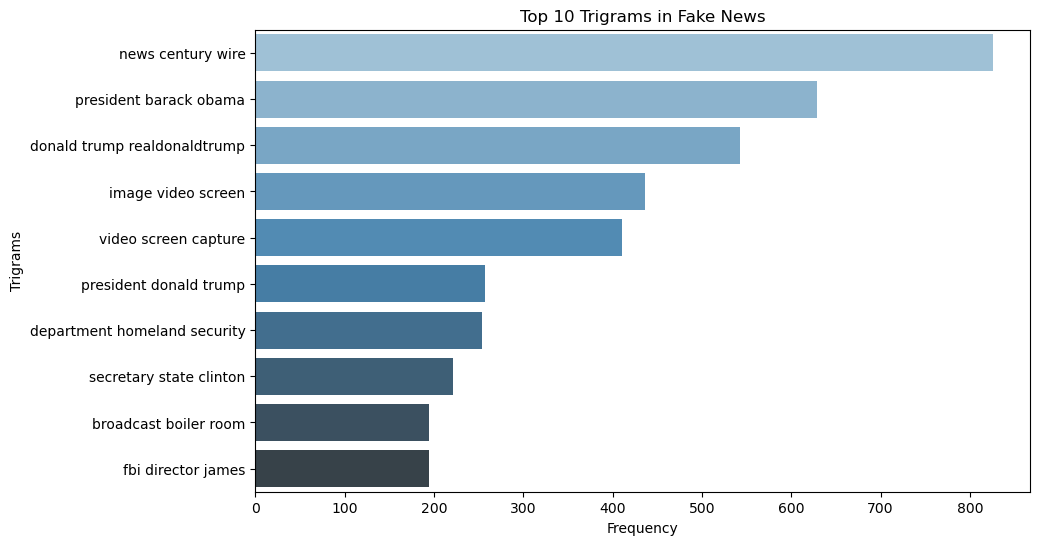

In [123]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
# Get top 10 trigrams
top10_trigrams_fake = get_top_ngrams(fake_news_text, n=10, ngram_range=(3,3))

#print the top 10 true news
print_top_news("Top 10 Trigrams in Fake News:", top10_trigrams_fake)

trigrams = [t for t, _ in top10_trigrams_fake]
freqs = [f for _, f in top10_trigrams_fake]

#plot bar graph
plot_bar_graph("Top 10 Trigrams in Fake News", top10_trigrams_fake, "Frequency", "Trigrams","Blues_d")

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [124]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [125]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [126]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [127]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [128]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [129]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [130]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [131]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [132]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [133]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [134]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [135]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [136]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
!pip install gensim
import gensim.downloader as api

print("Downloading Word2Vec Google News 300...")
word2vec_model = api.load("word2vec-google-news-300")

print("Model Loaded Successfully!")

[===============================-------------------] 62.1% 1032.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.4% 1519.9/1662.8MB downloadedModel Loaded Successfully!


In [137]:
#Temporary code to save model
# word2vec_model.save("word2vec-google-news-300.model")

In [ ]:
# #Temporary code
# from gensim.models import KeyedVectors

# # Load instantly from disk
# word2vec_model = KeyedVectors.load("word2vec-google-news-300.model", mmap='r')

# print("Model loaded!")

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [138]:
#creating a method for extracting the vectors
def get_document_vector(doc, model):
    # Filter out words not in model vocabulary
    words = [word for word in doc.split() if word in model.key_to_index]
    if len(words) >= 1:
        return np.mean(model[words], axis=0)
    else:
        # If no words in vocab, return zero vector
        return np.zeros(model.vector_size)

In [139]:
#Earlier we did not create a merged vector for validation. Now we need to
val_df = pd.DataFrame({'lemmatized_text': X_val, 'news_label': y_val})

#lets merge
val_df = pd.merge(val_df, df_clean, on=["news_label","lemmatized_text"], how='inner')

# Add a new column to calculate the character length of cleaned news text
val_df['cleaned_text_length'] = val_df['cleaned_text'].astype(str).apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
val_df['lemmatized_text_length'] = val_df['lemmatized_text'].astype(str).apply(len)

val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17326 entries, 0 to 17325
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   lemmatized_text         17299 non-null  object
 1   news_label              17326 non-null  int64 
 2   news_text               17326 non-null  object
 3   cleaned_text            17326 non-null  object
 4   cleaned_text_length     17326 non-null  int64 
 5   lemmatized_text_length  17326 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 812.3+ KB


In [140]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
X_train_vectors = np.vstack(train_df['cleaned_text'].apply(lambda x: get_document_vector(str(x), word2vec_model)))
X_val_vectors = np.vstack(val_df['cleaned_text'].apply(lambda x: get_document_vector(str(x), word2vec_model)))

## Extract the target variable for the training data and validation data
y_train = train_df['news_label'].values
y_val = val_df['news_label'].values

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [155]:
## Initialise Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

## Train Logistic Regression model on training data
logistic_regression.fit(X_train_vectors, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [156]:
## Predict on validation data
y_val_pred = logistic_regression.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [168]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='binary')  # since it's binary classification
recall = recall_score(y_val, y_val_pred, average='binary')
f1 = f1_score(y_val, y_val_pred, average='binary')

# Print metrics
print("Regression Model Metrics")
print("-"*30)
print(f"Validation Accuracy: {accuracy: .4f}")
print(f"Precision: {precision: .4f}")
print(f"Recall: {recall: .4f}")
print(f"F1-Score: {f1: .4f}")
print("-"*30)

Regression Model Metrics
------------------------------
Validation Accuracy:  0.9565
Precision:  0.9274
Recall:  0.9609
F1-Score:  0.9439
------------------------------


In [169]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     10728
           1       0.93      0.96      0.94      6598

    accuracy                           0.96     17326
   macro avg       0.95      0.96      0.95     17326
weighted avg       0.96      0.96      0.96     17326



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [170]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dt_model.fit(X_train_vectors, y_train)

## Predict on validation data
y_val_pred_dt = dt_model.predict(X_val_vectors)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [171]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
precision_dt = precision_score(y_val, y_val_pred_dt)
recall_dt = recall_score(y_val, y_val_pred_dt)
f1_dt = f1_score(y_val, y_val_pred_dt)

# Print results
print("Decision Tree Performance on Validation Data:")
print(f"Accuracy  : {accuracy_dt:.4f}")
print(f"Precision : {precision_dt:.4f}")
print(f"Recall    : {recall_dt:.4f}")
print(f"F1-score  : {f1_dt:.4f}")

Decision Tree Performance on Validation Data:
Accuracy  : 0.9095
Precision : 0.8820
Recall    : 0.8801
F1-score  : 0.8810


In [173]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     10728
           1       0.88      0.88      0.88      6598

    accuracy                           0.91     17326
   macro avg       0.90      0.90      0.90     17326
weighted avg       0.91      0.91      0.91     17326



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [174]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

## Train Random Forest model on training data
rf_model.fit(X_train_vectors, y_train)

## Predict on validation data
y_val_pred_rf = rf_model.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [175]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_val_pred_rf)
precision = precision_score(y_val, y_val_pred_rf)
recall = recall_score(y_val, y_val_pred_rf)
f1 = f1_score(y_val, y_val_pred_rf)

# Print results
print("Random Forest Performance on Validation Data:")
print("-"*30)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print("-"*30)

Random Forest Performance on Validation Data:
------------------------------
Accuracy : 0.9602
Precision: 0.9406
Recall   : 0.9559
F1-score : 0.9482
------------------------------


In [178]:
# Classification Report
print( "\nClassification Report:\n", classification_report(y_val, y_val_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     10728
           1       0.94      0.96      0.95      6598

    accuracy                           0.96     17326
   macro avg       0.96      0.96      0.96     17326
weighted avg       0.96      0.96      0.96     17326



## **8.** Conclusion <font color = red>[5 marks]</font>
Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

### Observations
1. Logistic Regression
    - Accuracy: ~96%
    - Performs decently, interpretable and simple, bit high recall for true news.
2. Decision Tree
    - Accuracy: ~91%
    - Not bad but weaker compared to other two models
    - Likely overfitting
3. Random Forest
    - Accuracy: ~96%
    - Best balance between precision, recall, and F1 across both fake and true news.

### Conclusions
- Random Forest emerges as the best model for fake news detection in this study.
    - It achieved the highest accuracy (96%), strong recall and precision for both fake and true news, and overall robustness.
- Logistic Regression is a good baseline, easy to interpret, but slightly less accurate.
- Decision Tree alone is not as reliable due to lower accuracy and overfitting tendencies.
- Recommendation: Use Random Forest for deployment if predictive performance is the priority. If explainability is crucial, Logistic Regression could complement it as a secondary model.